# [BAT512] Advanced Data Mining with AI <br/><br/> 4주차 실습자료

- 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 탐색

- 데이터 로드
    - 위스콘신 유방암 데이터(Scikit-learn 제공)

In [2]:
from sklearn import datasets
rawdata = datasets.load_breast_cancer()

- 데이터셋 통합

In [3]:
type(rawdata)

sklearn.utils.Bunch

In [4]:
rawdata.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
type(rawdata["data"])

numpy.ndarray

In [6]:
rawdata["data"].shape

(569, 30)

In [7]:
type(rawdata["target"])

numpy.ndarray

In [8]:
rawdata["target"].shape

(569,)

In [9]:
data_target = np.concatenate([rawdata["data"], rawdata["target"].reshape(-1,1)], axis=1)

In [10]:
data_target.shape

(569, 31)

In [11]:
independent_variables = rawdata["feature_names"].tolist()
dependent_variable = ["Target"]
feature_list = independent_variables+dependent_variable

In [12]:
data = pd.DataFrame(data_target, columns=feature_list)

- 데이터 형태 확인

In [13]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [14]:
data.shape

(569, 31)

In [15]:
print(rawdata["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

- 데이터 범위 및 기술 통계량 확인

In [16]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


- 결측치 확인

In [17]:
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

- Target 값 분포 확인

In [20]:
data["Target"].value_counts()

1.0    357
0.0    212
Name: Target, dtype: int64

## 데이터 정제

- 변수 변환

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data[independent_variables])

In [26]:
X = pd.DataFrame(X, columns=independent_variables)

In [27]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [28]:
y = data["Target"]

In [29]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: Target, Length: 569, dtype: float64

## 데이터셋 분할

- Training/Test 데이터셋 분할

In [39]:
from sklearn.model_selection import train_test_split

In [76]:
print("X:",X.shape,"y:",y.shape)

X: (569, 30) y: (569,)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
print("X_train:",X_train.shape,"y_train:",y_train.shape,"\nX_test:",X_test.shape,"y_test:",y_test.shape)

X_train: (455, 30) y_train: (455,) 
X_test: (114, 30) y_test: (114,)


- Training/Validate/Test 데이터셋 분할

In [156]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

In [157]:
print("X_train:",X_train.shape,"y_train:",y_train.shape,"\nX_val:",X_val.shape,"y_val:",y_val.shape,"\nX_test:",X_test.shape,"y_test:",y_test.shape)

X_train: (364, 30) y_train: (364,) 
X_val: (91, 30) y_val: (91,) 
X_test: (114, 30) y_test: (114,)


- K-Fold cross validation

In [150]:
from sklearn.model_selection import StratifiedKFold

In [152]:
kf_splitter = StratifiedKFold(n_splits=5)
kf_splitter

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [154]:
for i, (train_index, test_index) in enumerate(kf_splitter.split(X, y)):
    print("Fold",i)
    print("train index:",train_index[:10],"test index:",test_index[:10])
    print("train size:",len(train_index),"test size:",len(test_index),"\n")
    
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

Fold 0
train index: [53 54 56 57 62 64 65 70 72 73] test index: [0 1 2 3 4 5 6 7 8 9]
train size: 454 test size: 115 

Fold 1
train index: [0 1 2 3 4 5 6 7 8 9] test index: [53 54 56 57 62 64 65 70 72 73]
train size: 454 test size: 115 

Fold 2
train index: [0 1 2 3 4 5 6 7 8 9] test index: [164 167 168 171 172 177 180 181 182 184]
train size: 456 test size: 113 

Fold 3
train index: [0 1 2 3 4 5 6 7 8 9] test index: [255 256 257 258 259 260 261 262 263 264]
train size: 456 test size: 113 

Fold 4
train index: [0 1 2 3 4 5 6 7 8 9] test index: [389 392 393 400 408 414 417 430 432 433]
train size: 456 test size: 113 



## 로지스틱 회귀 모델 학습

In [30]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

- 모델 선언 및 학습

In [158]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

- 회귀 계수 확인

In [159]:
model.coef_

array([[-0.75918314, -0.63572102, -0.80708509, -1.01068961,  0.37091316,
        -0.30359595, -1.56869994, -2.24537255,  0.23686156,  1.36310498,
        -1.27092794,  0.17311934, -0.9777699 , -0.86874002,  0.26073297,
         0.41761985,  0.36444598,  0.1038554 ,  0.54718621,  0.52229763,
        -1.54133934, -1.23109497, -1.4220481 , -1.37445877, -0.43882558,
        -0.77131574, -1.11986208, -2.12007571, -0.7339818 , -0.17956126]])

In [160]:
model.intercept_

array([4.93908765])

In [161]:
print("가중치:", np.round(model.coef_, 2))
print("편향:", np.round(model.intercept_,2))

가중치: [[-0.76 -0.64 -0.81 -1.01  0.37 -0.3  -1.57 -2.25  0.24  1.36 -1.27  0.17
  -0.98 -0.87  0.26  0.42  0.36  0.1   0.55  0.52 -1.54 -1.23 -1.42 -1.37
  -0.44 -0.77 -1.12 -2.12 -0.73 -0.18]]
편향: [4.94]


In [162]:
coefficients = pd.Series(model.coef_[0], index=independent_variables)

- 회귀 계수를 통한 종속변수에 대한 독립변수의 영향력 확인

In [163]:
coefficients.sort_values(ascending=False)

mean fractal dimension     1.363105
symmetry error             0.547186
fractal dimension error    0.522298
compactness error          0.417620
mean smoothness            0.370913
concavity error            0.364446
smoothness error           0.260733
mean symmetry              0.236862
texture error              0.173119
concave points error       0.103855
worst fractal dimension   -0.179561
mean compactness          -0.303596
worst smoothness          -0.438826
mean texture              -0.635721
worst symmetry            -0.733982
mean radius               -0.759183
worst compactness         -0.771316
mean perimeter            -0.807085
area error                -0.868740
perimeter error           -0.977770
mean area                 -1.010690
worst concavity           -1.119862
worst texture             -1.231095
radius error              -1.270928
worst area                -1.374459
worst perimeter           -1.422048
worst radius              -1.541339
mean concavity            -1

In [105]:
coefficients.abs().sort_values(ascending=False)

worst concave points       2.372138
mean concave points        2.306121
worst radius               1.688764
mean concavity             1.637080
worst perimeter            1.575584
worst texture              1.520202
worst area                 1.497164
mean fractal dimension     1.406396
worst concavity            1.288814
radius error               1.243392
mean texture               1.162237
mean area                  1.074939
perimeter error            0.973884
worst smoothness           0.924471
area error                 0.874921
mean perimeter             0.854784
worst compactness          0.853480
mean radius                0.789091
fractal dimension error    0.718888
compactness error          0.686221
worst symmetry             0.628213
symmetry error             0.616932
mean symmetry              0.517555
mean compactness           0.498740
texture error              0.412586
concavity error            0.407862
smoothness error           0.295073
worst fractal dimension    0

- 로지스틱 회귀분석 결과 시각화

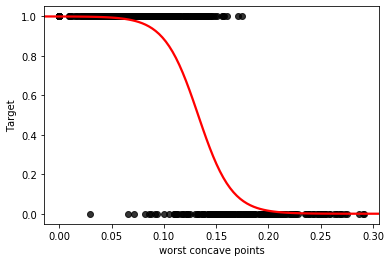

In [164]:
# worst concave points
sns.regplot(x="worst concave points", y="Target", data=data, logistic=True, ci=None, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})

## 모델 성능 평가

### Training/Test 데이터셋 분할의 경우

- 테스트 데이터에 대한 예측

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [177]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_test_hat = model.predict(X_test)
y_test_hat = pd.Series(y_test_hat, index=y_test.index)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [178]:
display(pd.concat([y_test, y_test_hat], axis=1))

,Target,0
77,0.0,0.0
415,1.0,1.0
12,0.0,0.0
247,1.0,1.0
351,0.0,0.0
...,...,...
324,1.0,1.0
46,1.0,1.0
255,0.0,1.0
320,1.0,1.0


- 오차행렬 구축

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
conf_mat = confusion_matrix(y_test, y_test_hat)
conf_mat

array([[37,  4],
       [ 0, 73]])

In [169]:
TN, FP, FN, TP = conf_mat.ravel()
print(TN, FP, FN, TP)

37 4 0 73


In [170]:
from sklearn.metrics import ConfusionMatrixDisplay

ImportError: cannot import name 'ConfusionMatrixDisplay'

- 정확도, 정밀도, 재현율, F1 점수

In [171]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

In [184]:
Accuracy = (TP+TN) / conf_mat.sum()
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
F1_score = 2*TP / (2*TP+FN+FP)
print("Accuracy:",np.round(Accuracy,4),"\nPrecision:",np.round(Precision,4),"\nRecall:",np.round(Recall,4),"\nF1 score:",np.round(F1_score,4))

Accuracy: 0.9649 
Precision: 0.9481 
Recall: 1.0 
F1 score: 0.9733


In [172]:
Accuracy = accuracy_score(y_test, y_test_hat)
Precision, Recall, F1_score, support = precision_recall_fscore_support(y_test, y_test_hat)
print("Accuracy:",np.round(Accuracy,4),"\nPrecision:",np.round(Precision[1],4),"\nRecall:",np.round(Recall[1],4),"\nF1 score:",np.round(F1_score[1],4))

Accuracy: 0.9649 
Precision: 0.9481 
Recall: 1.0 
F1 score: 0.9733


In [173]:
report = classification_report(y_test, y_test_hat, target_names=["Malignant", "Benign"])
print(report)

              precision    recall  f1-score   support

   Malignant       1.00      0.90      0.95        41
      Benign       0.95      1.00      0.97        73

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### 5-fold cross validation의 경우

In [188]:
Accuracy_list, Precision_list, Recall_list, F1_score_list = [], [], [], []
for i, (train_index, test_index) in enumerate(kf_splitter.split(X, y)):
    print("Fold",i)
    
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_test_hat = model.predict(X_test)
    y_test_hat = pd.Series(y_test_hat, index=y_test.index)
    
    Accuracy = accuracy_score(y_test, y_test_hat)
    Precision, Recall, F1_score, support = precision_recall_fscore_support(y_test, y_test_hat)
    print("Accuracy:",np.round(Accuracy,4),"\nPrecision:",np.round(Precision[1],4),"\nRecall:",np.round(Recall[1],4),"\nF1 score:",np.round(F1_score[1],4),"\n")
    
    Accuracy_list.append(Accuracy)
    Precision_list.append(Precision)
    Recall_list.append(Recall)
    F1_score_list.append(F1_score)

Fold 0
Accuracy: 0.9478 
Precision: 0.9342 
Recall: 0.9861 
F1 score: 0.9595 

Fold 1
Accuracy: 0.9652 
Precision: 0.9474 
Recall: 1.0 
F1 score: 0.973 

Fold 2
Accuracy: 0.9558 
Precision: 0.9342 
Recall: 1.0 
F1 score: 0.966 

Fold 3
Accuracy: 0.9646 
Precision: 0.9589 
Recall: 0.9859 
F1 score: 0.9722 

Fold 4
Accuracy: 0.9646 
Precision: 0.9589 
Recall: 0.9859 
F1 score: 0.9722 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [189]:
display(Accuracy_list)

[0.9478260869565217,
 0.9652173913043478,
 0.9557522123893806,
 0.9646017699115044,
 0.9646017699115044]

In [195]:
Accuracy_final = np.mean(Accuracy_list)
Precision_final = np.mean(Precision_list)
Recall_final = np.mean(Recall_list)
F1_score_final = np.mean(F1_score_list)

print("5-fold cross validation results","\nAccuracy_final:",np.round(Accuracy_final,4),"\nPrecision_final:",np.round(Precision_final,4),"\nRecall_final:",np.round(Recall_final,4),"\nF1 score_final:",np.round(F1_score_final,4))

5-fold cross validation results 
Accuracy_final: 0.9596 
Precision_final: 0.9658 
Recall_final: 0.9487 
F1 score_final: 0.956
